In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


# Load the CSV file

In [ ]:
df = pd.read_csv('/content/student-mat.csv')
print(df.head())
print(df.info())
print(df.describe())

print(df.isnull().sum())
df = pd.get_dummies(df, drop_first=True)
print(df)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

# Separate features (X) and target variables (y)

In [ ]:
X = df.drop(['G1', 'G2', 'G3'], axis=1)
y = df[['G1', 'G2', 'G3']]


# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### I have used 5 models
1. Linear Regression
2. Decisio Tree
3. Random Forest
4. SVM
5. XGBoost
### Calculating RME, RAE, and R^2 for 5 models..

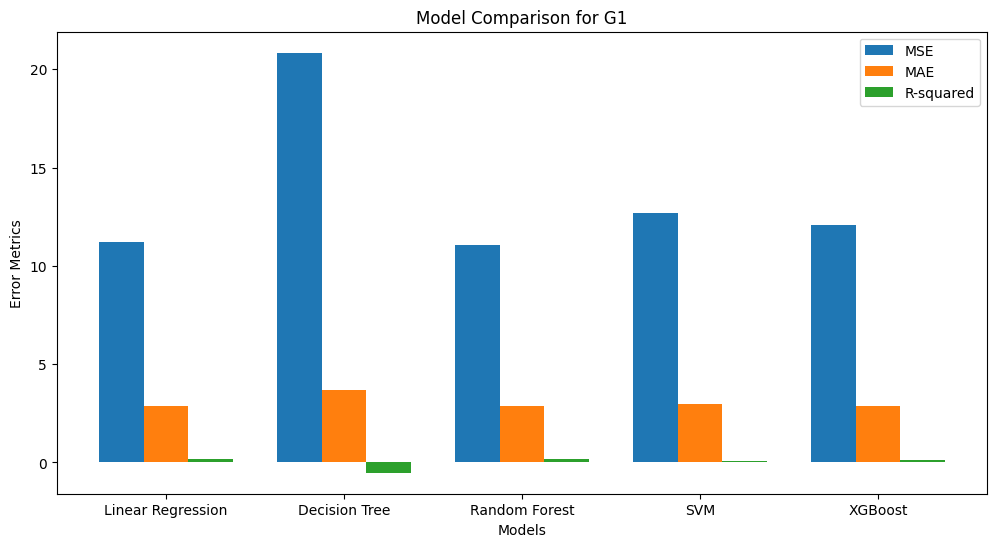

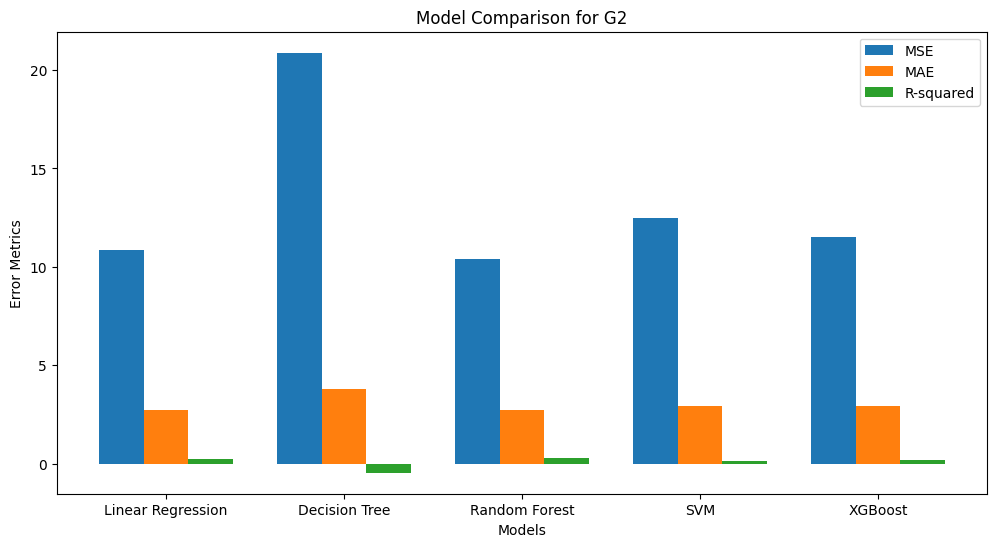

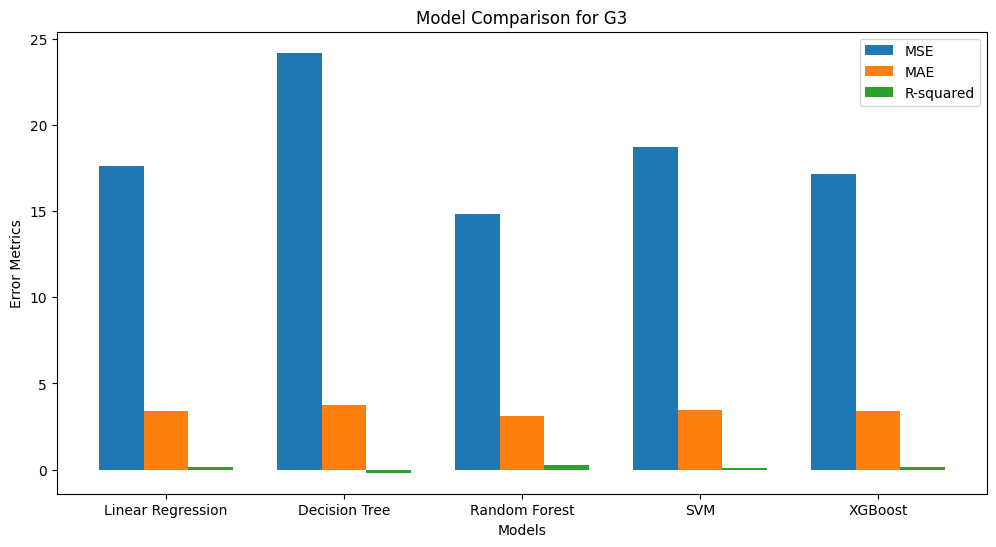

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'XGBoost': XGBRegressor()
}

# Initialize lists to store results
mse_results = {'G1': [], 'G2': [], 'G3': []}
mae_results = {'G1': [], 'G2': [], 'G3': []}
r2_results = {'G1': [], 'G2': [], 'G3': []}

# Train and evaluate each model
for target_variable in ['G1', 'G2', 'G3']:
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train[target_variable])

        # Make predictions
        predictions = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test[target_variable], predictions)
        mae = mean_absolute_error(y_test[target_variable], predictions)
        r2 = r2_score(y_test[target_variable], predictions)

        # Store results
        mse_results[target_variable].append(mse)
        mae_results[target_variable].append(mae)
        r2_results[target_variable].append(r2)

# Bar chart for G1
labels = list(models.keys())
bar_width = 0.25
index = np.arange(len(labels))

plt.figure(figsize=(12, 6))

plt.bar(index, mse_results['G1'], width=bar_width, label='MSE')
plt.bar(index + bar_width, mae_results['G1'], width=bar_width, label='MAE')
plt.bar(index + 2*bar_width, r2_results['G1'], width=bar_width, label='R-squared')

plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.title('Model Comparison for G1')
plt.xticks(index + bar_width, labels)
plt.legend()
plt.show()

# Bar chart for G2
plt.figure(figsize=(12, 6))

plt.bar(index, mse_results['G2'], width=bar_width, label='MSE')
plt.bar(index + bar_width, mae_results['G2'], width=bar_width, label='MAE')
plt.bar(index + 2*bar_width, r2_results['G2'], width=bar_width, label='R-squared')

plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.title('Model Comparison for G2')
plt.xticks(index + bar_width, labels)
plt.legend()
plt.show()

# Bar chart for G3
plt.figure(figsize=(12, 6))

plt.bar(index, mse_results['G3'], width=bar_width, label='MSE')
plt.bar(index + bar_width, mae_results['G3'], width=bar_width, label='MAE')
plt.bar(index + 2*bar_width, r2_results['G3'], width=bar_width, label='R-squared')

plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.title('Model Comparison for G3')
plt.xticks(index + bar_width, labels)
plt.legend()
plt.show()


### Calculating RME, RAE, and R^2 by performing a grid search on the training data and making predictions using cross-validation for 5 models.


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

targets = ['G1', 'G2', 'G3']

model_names = []
mse_results = {'G1': [], 'G2': [], 'G3': []}
mae_results = {'G1': [], 'G2': [], 'G3': []}
r2_results = {'G1': [], 'G2': [], 'G3': []}

# Define models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
svm_model = SVR()
xgboost_model = XGBRegressor()

# Create a list of models
models = [linear_model, decision_tree_model, random_forest_model, svm_model, xgboost_model]

# Define hyperparameter grids for each model
linear_param_grid = {}
decision_tree_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_forest_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
xgboost_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

param_grids = [linear_param_grid, decision_tree_param_grid, random_forest_param_grid, svm_param_grid, xgboost_param_grid]

# Perform grid search for each model and each target variable
for model, param_grid in zip(models, param_grids):
    for target in targets:
        print(f'Model: {model.__class__.__name__} - Target: {target}')

        # Extract the corresponding y_train and y_test
        y_target = y_train[target]

        # Create a GridSearchCV object
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

        # Perform the grid search on the training data
        grid_search.fit(X_train, y_target)

        # Get the best hyperparameters from the grid search
        best_params = grid_search.best_params_

        # Train the model with the best hyperparameters on the entire training set
        best_model = model.__class__(**best_params)
        best_model.fit(X_train, y_target)

        # Make predictions using cross-validation
        y_pred_cv = cross_val_predict(best_model, X_train, y_target, cv=5)

        # Evaluate the performance of the model
        mse = mean_squared_error(y_target, y_pred_cv)
        mae = mean_absolute_error(y_target, y_pred_cv)
        r2 = r2_score(y_target, y_pred_cv)

        # Append results to lists
        model_names.append(f'{model.__class__.__name__} - {target}')
        mse_results[target].append(mse)
        mae_results[target].append(mae)
        r2_results[target].append(r2)

        print(f'Best Hyperparameters: {best_params}')
        print(f'Mean Squared Error (MSE): {mse}')
        print(f'Mean Absolute Error (MAE): {mae}')
        print(f'R-squared (R2): {r2}\n')



Model: LinearRegression - Target: G1
Best Hyperparameters: {}
Mean Squared Error (MSE): 9.771569045356868
Mean Absolute Error (MAE): 2.539127450136712
R-squared (R2): 0.052702288181318724

Model: LinearRegression - Target: G2
Best Hyperparameters: {}
Mean Squared Error (MSE): 14.321374865236665
Mean Absolute Error (MAE): 2.887641003955189
R-squared (R2): -0.01841830759391927

Model: LinearRegression - Target: G3
Best Hyperparameters: {}
Mean Squared Error (MSE): 22.127387282263836
Mean Absolute Error (MAE): 3.575559448895571
R-squared (R2): -0.05345853965727421

Model: DecisionTreeRegressor - Target: G1
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error (MSE): 12.245286114240585
Mean Absolute Error (MAE): 2.794787271448664
R-squared (R2): -0.187110428503505

Model: DecisionTreeRegressor - Target: G2
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error (MSE): 16.96167532000371
M

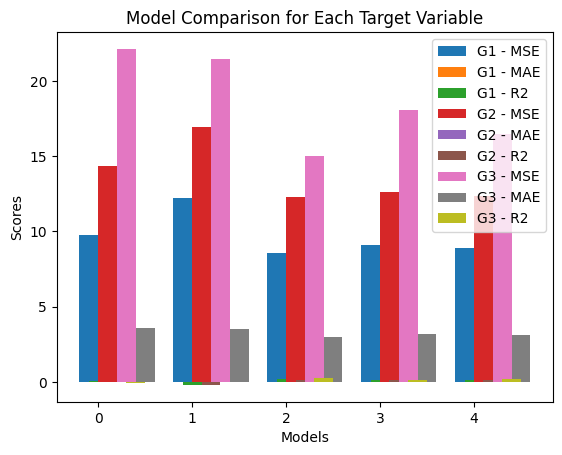

In [ ]:
# Plot the results as bar charts
width = 0.2
# models = [linear_model, decision_tree_model, random_forest_model, svm_model, xgboost_model]
x = np.arange(len(models))

fig, ax = plt.subplots()

for i, target in enumerate(targets):
    rects_mse = ax.bar(x - width/2 + i * width, mse_results[target], width, label=f'{target} - MSE')
    rects_mae = ax.bar(x + width/2 + i * width, mae_results[target], width, label=f'{target} - MAE')
    rects_r2 = ax.bar(x + i * width, r2_results[target], width, label=f'{target} - R2')

ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Model Comparison for Each Target Variable')
ax.set_xticks(x)
ax.legend()

plt.show()

### According to the above charts, among these 5 models, the Random Forest model has the minimum Mean Square Error (MSE) and Mean Absolute Error (MAE), and it also exhibits the highest R-square. Therefore, we can consider the **Random Forest model** as the best model.





#Factors that Most Effectively Contribute to Determining a Student's Grade

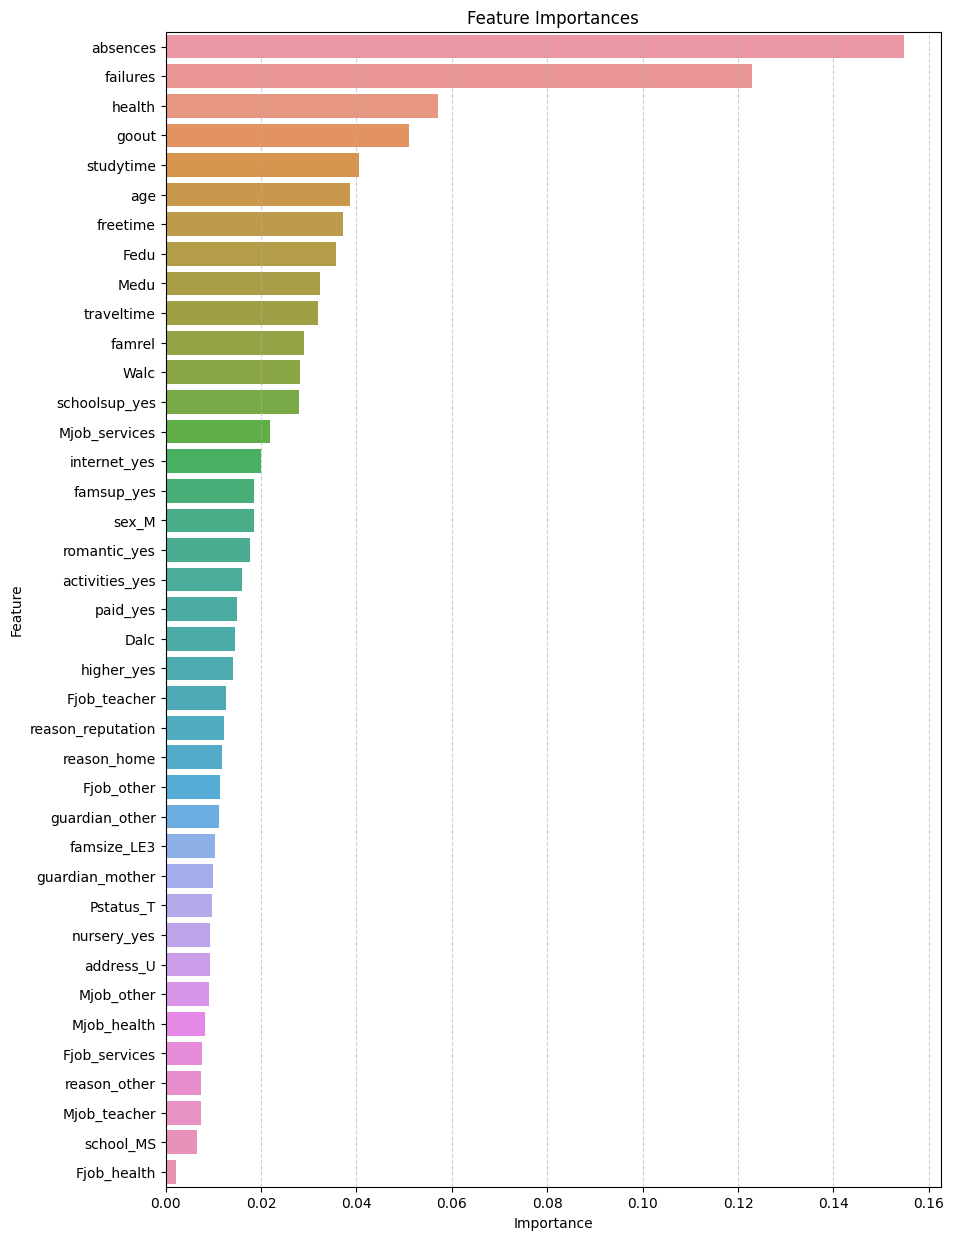

In [ ]:
import seaborn as sns

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Feature Importance Analysis
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(10, 15))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importances")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

